# Mini Project - Classification of Wind Turbine Alarms
To start I will first look at the alarm data, and 1 quarter worth of data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import sklearn
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.1.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.0
pytest: 3.0.7
pip: 10.0.1
setuptools: 27.2.0
Cython: 0.25.2
numpy: 1.12.1
scipy: 0.19.0
pyarrow: None
xarray: None
IPython: 5.3.0
sphinx: 1.5.6
patsy: 0.4.1
dateutil: 2.6.0
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.2.2
numexpr: 2.6.2
feather: None
matplotlib: 2.0.2
openpyxl: 2.4.7
xlrd: 1.0.0
xlwt: 1.2.0
xlsxwriter: 0.9.6
lxml: 3.7.3
bs4: 4.6.0
html5lib: 0.9999999
sqlalchemy: 1.1.9
pymysql: 0.8.0
psycopg2: None
jinja2: 2.9.6
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [2]:
# path = 'C:\\Users\\kthomas\\Google Drive\\SMU\\DataMining\\MiniProject\\Data\\'
# path = '~/Documents/thomaskh522@gmail.com/SMU/DataMining/MiniProject/Data/'
path = 'D:/Pattern/'
# path = 'O:/wpshistory_LOGANSGAP/'

alarms_desc = pd.read_csv(path + "Siemens_Fault_Code_Descriptions.csv")
scada = pd.read_csv(path + "SCADAcombined2017Q1.csv")
#q2 = pd.read_csv(path + "SCADAcombined2017Q2.csv")
#q3 = pd.read_csv(path + "SCADAcombined2017Q3.csv")
#q4 = pd.read_csv(path + "SCADAcombined2017Q4.csv")

In [3]:
# merge the alarms with the alarm descriptions
df = scada.merge(alarms_desc, 
         left_on = 'wtc_AlarmCde_endvalue', 
         right_on="Code",
         how='left')


df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index('TimeStamp', inplace=True)
df.index

# drop columns that were missing values
df.dropna(inplace=True)

df['wtc_AlarmCde_endvalue'] = df['wtc_AlarmCde_endvalue'].astype(int)

print(df.shape)
print(df.info())
df.head()

(1124209, 25)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1124209 entries, 2017-01-02 15:30:00 to 2017-02-24 02:10:00
Data columns (total 25 columns):
Name                     1124209 non-null object
StationId                1124209 non-null int64
CommunicationId          1124209 non-null int64
NeighbourId              1124209 non-null int64
NeighbourIdTwo           1124209 non-null int64
XPos                     1124209 non-null int64
YPos                     1124209 non-null int64
wtc_GenRpm_mean          1124209 non-null float64
wtc_MainSRpm_mean        1124209 non-null float64
wtc_TwrHumid_mean        1124209 non-null float64
wtc_PowerRef_endvalue    1124209 non-null float64
wtc_PrWindSp_mean        1124209 non-null float64
wtc_NacelPos_mean        1124209 non-null float64
wtc_AmbieTmp_mean        1124209 non-null float64
wtc_GeOilTmp_mean        1124209 non-null float64
wtc_HubTemp_mean         1124209 non-null float64
wtc_NacelTmp_mean        1124209 non-null float64
wtc

Name  StationId  CommunicationId  NeighbourId  \
TimeStamp                                                            
2017-01-02 15:30:00  T004          6          2308964            5   
2017-01-02 15:30:00  T007          9          2308967            8   
2017-01-02 15:30:00  T010         12          2308970           11   
2017-01-02 15:30:00  T017         19          2308977           20   
2017-01-02 15:30:00  T020         22          2308980           21   

                     NeighbourIdTwo  XPos  YPos  wtc_GenRpm_mean  \
TimeStamp                                                          
2017-01-02 15:30:00               7    30   600         1355.321   
2017-01-02 15:30:00              10  1065   300         1207.784   
2017-01-02 15:30:00              13  1065   750         1049.281   
2017-01-02 15:30:00              21    30  1200         1261.156   
2017-01-02 15:30:00              20    30  1500         1061.441   

                     wtc_MainSRpm_mean  wtc_TwrHumid_mean     ...      \
TimeStamp                                                     ...       
2017-01-02 15:30:00           14.96006           31.62146     ...       
2017-01-02 15:30:00           13.33110           34.04166     ...       
2017-01-02 15:30:00           11.58130           36.77564     ...       
2017-01-02 15:30:00           13.92016           34.10806     ...       
2017-01-02 15:30:00           11.71441           35.99195     ...       

                     wtc_HubTemp_mean  wtc_NacelTmp_mean  wtc_ConvWTmp_mean  \
TimeStamp                                                                     
2017-01-02 15:30:00          20.00000           24.00000           31.53725   
2017-01-02 15:30:00          18.87432           24.00000           29.08095   
2017-01-02 15:30:00          20.00000           23.00000           29.94152   
2017-01-02 15:30:00          19.00000           23.86940           30.26724   
2017-01-02 15:30:00          17.00000           23.00992           30.10798   

                     wtc_HydOilTm_mean  wtc_MainBTmp_mean  \
TimeStamp                                                   
2017-01-02 15:30:00           30.35122           38.00135   
2017-01-02 15:30:00           30.22913           40.00000   
2017-01-02 15:30:00           30.33175           36.98768   
2017-01-02 15:30:00           30.30332           39.00000   
2017-01-02 15:30:00           30.25607           38.00000   

                     wtc_AlarmCde_endvalue  wtc_ScInOper_timeon  Code  \
TimeStamp                                                               
2017-01-02 15:30:00                      0                600.0   0.0   
2017-01-02 15:30:00                      0                600.0   0.0   
2017-01-02 15:30:00                      0                600.0   0.0   
2017-01-02 15:30:00                      0                600.0   0.0   
2017-01-02 15:30:00                      0                600.0   0.0   

                          Description  Fault Type  
TimeStamp                                          
2017-01-02 15:30:00  System faultless           W  
2017-01-02 15:30:00  System faultless           W  
2017-01-02 15:30:00  System faultless           W  
2017-01-02 15:30:00  System faultless           W  
2017-01-02 15:30:00  System faultless           W  

[5 rows x 25 columns]

In [4]:
df.describe().transpose()

count          mean          std           min  \
StationId              1124209.0  4.400595e+01    25.082154  1.000000e+00   
CommunicationId        1124209.0  2.309002e+06    25.082155  2.308959e+06   
NeighbourId            1124209.0  4.400955e+01    24.896661  2.000000e+00   
NeighbourIdTwo         1124209.0  4.464720e+01    24.663820  1.000000e+00   
XPos                   1124209.0  5.360678e+02   340.134233  3.000000e+01   
YPos                   1124209.0  7.634900e+02   424.562275  1.500000e+02   
wtc_GenRpm_mean        1124209.0  1.144893e+03   352.769949  6.000000e-01   
wtc_MainSRpm_mean      1124209.0  1.263627e+01     3.894018  0.000000e+00   
wtc_TwrHumid_mean      1124209.0  4.208072e+01    15.011253  8.196293e+00   
wtc_PowerRef_endvalue  1124209.0  1.808086e+03   628.956449  0.000000e+00   
wtc_PrWindSp_mean      1124209.0  8.374819e+00     3.409745  0.000000e+00   
wtc_NacelPos_mean      1124209.0  1.849617e+02    93.535315  0.000000e+00   
wtc_AmbieTmp_mean      1124209.0  1.381125e+01     6.982959 -8.000000e+00   
wtc_GeOilTmp_mean      1124209.0  4.380751e+01     4.668147  1.200000e+01   
wtc_HubTemp_mean       1124209.0  1.852822e+01     6.342536 -4.000000e+00   
wtc_NacelTmp_mean      1124209.0  2.165876e+01     5.892747 -1.000000e+00   
wtc_ConvWTmp_mean      1124209.0  3.153234e+01     3.604899  1.895848e+00   
wtc_HydOilTm_mean      1124209.0  3.072236e+01     2.602521  0.000000e+00   
wtc_MainBTmp_mean      1124209.0  3.928515e+01     5.536856  8.000000e+00   
wtc_AlarmCde_endvalue  1124209.0  3.206537e+02  3420.382666  0.000000e+00   
wtc_ScInOper_timeon    1124209.0  5.582593e+02   145.582944  0.000000e+00   
Code                   1124209.0  3.206537e+02  3420.382666  0.000000e+00   

                                25%           50%           75%           max  
StationId              2.200000e+01  4.400000e+01  6.600000e+01  8.700000e+01  
CommunicationId        2.308980e+06  2.309002e+06  2.309024e+06  2.309045e+06  
NeighbourId            2.300000e+01  4.300000e+01  6.500000e+01  8.600000e+01  
NeighbourIdTwo         2.400000e+01  4.400000e+01  6.600000e+01  8.700000e+01  
XPos                   2.600000e+02  4.900000e+02  8.350000e+02  1.065000e+03  
YPos                   4.500000e+02  7.500000e+02  1.050000e+03  1.650000e+03  
wtc_GenRpm_mean        9.185187e+02  1.242154e+03  1.459263e+03  1.536638e+03  
wtc_MainSRpm_mean      1.013776e+01  1.370986e+01  1.610615e+01  1.696051e+01  
wtc_TwrHumid_mean      2.975941e+01  4.019048e+01  5.397986e+01  8.648268e+01  
wtc_PowerRef_endvalue  1.360000e+03  2.215000e+03  2.300000e+03  2.300000e+03  
wtc_PrWindSp_mean      5.965065e+00  8.268862e+00  1.076988e+01  2.327238e+01  
wtc_NacelPos_mean      1.351906e+02  1.905169e+02  2.418430e+02  3.600000e+02  
wtc_AmbieTmp_mean      9.000000e+00  1.500000e+01  1.900000e+01  3.100000e+01  
wtc_GeOilTmp_mean      4.100000e+01  4.413762e+01  4.702472e+01  5.669942e+01  
wtc_HubTemp_mean       1.400000e+01  1.984933e+01  2.300000e+01  3.400000e+01  
wtc_NacelTmp_mean      1.800000e+01  2.200000e+01  2.600000e+01  4.000000e+01  
wtc_ConvWTmp_mean      2.995552e+01  3.008520e+01  3.186365e+01  2.000000e+02  
wtc_HydOilTm_mean      3.006198e+01  3.033925e+01  3.095078e+01  5.300000e+01  
wtc_MainBTmp_mean      3.600000e+01  4.000000e+01  4.300000e+01  5.100000e+01  
wtc_AlarmCde_endvalue  0.000000e+00  0.000000e+00  0.000000e+00  6.410100e+04  
wtc_ScInOper_timeon    6.000000e+02  6.000000e+02  6.000000e+02  6.000000e+02  
Code                   0.000000e+00  0.000000e+00  0.000000e+00  6.410100e+04

In [10]:
# Create new varibles
df['alarm_category'] = ''
df['alarm_category'][df['Fault Type'] == '1'] = 'Fault'
df['alarm_category'][(df['Fault Type'] == 'W') & (df['Code'] == 0)] = 'SystemOK'
df['alarm_category'][(df['Fault Type'] == 'W') & (df['Code'] != 0)] = 'Warning'

df['MainBearingFault'] = 0
df['MainBearingFault'][df['Code'] == 64038] = 1 # Main bearing temp. too high

df['Available'] = 0
df['Available'][df['wtc_ScInOper_timeon'] == 600] = 1 # turbine available for full 10 mins

df['Derate'] = 0
df['Derate'][df['wtc_PowerRef_endvalue'] < 2.3 ] = 1

C:\Users\Casiano\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Casiano\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Casiano\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Casiano\Ana

In [11]:
df.describe().transpose()

count          mean          std           min  \
StationId              1124209.0  4.400595e+01    25.082154  1.000000e+00   
CommunicationId        1124209.0  2.309002e+06    25.082155  2.308959e+06   
NeighbourId            1124209.0  4.400955e+01    24.896661  2.000000e+00   
NeighbourIdTwo         1124209.0  4.464720e+01    24.663820  1.000000e+00   
XPos                   1124209.0  5.360678e+02   340.134233  3.000000e+01   
YPos                   1124209.0  7.634900e+02   424.562275  1.500000e+02   
wtc_GenRpm_mean        1124209.0  1.144893e+03   352.769949  6.000000e-01   
wtc_MainSRpm_mean      1124209.0  1.263627e+01     3.894018  0.000000e+00   
wtc_TwrHumid_mean      1124209.0  4.208072e+01    15.011253  8.196293e+00   
wtc_PowerRef_endvalue  1124209.0  1.808086e+03   628.956449  0.000000e+00   
wtc_PrWindSp_mean      1124209.0  8.374819e+00     3.409745  0.000000e+00   
wtc_NacelPos_mean      1124209.0  1.849617e+02    93.535315  0.000000e+00   
wtc_AmbieTmp_mean      1124209.0  1.381125e+01     6.982959 -8.000000e+00   
wtc_GeOilTmp_mean      1124209.0  4.380751e+01     4.668147  1.200000e+01   
wtc_HubTemp_mean       1124209.0  1.852822e+01     6.342536 -4.000000e+00   
wtc_NacelTmp_mean      1124209.0  2.165876e+01     5.892747 -1.000000e+00   
wtc_ConvWTmp_mean      1124209.0  3.153234e+01     3.604899  1.895848e+00   
wtc_HydOilTm_mean      1124209.0  3.072236e+01     2.602521  0.000000e+00   
wtc_MainBTmp_mean      1124209.0  3.928515e+01     5.536856  8.000000e+00   
wtc_AlarmCde_endvalue  1124209.0  3.206537e+02  3420.382666  0.000000e+00   
wtc_ScInOper_timeon    1124209.0  5.582593e+02   145.582944  0.000000e+00   
Code                   1124209.0  3.206537e+02  3420.382666  0.000000e+00   
MainBearingFault       1124209.0  0.000000e+00     0.000000  0.000000e+00   
Available              1124209.0  9.122779e-01     0.282890  0.000000e+00   
Derate                 1124209.0  1.498832e-03     0.038686  0.000000e+00   

                                25%           50%           75%           max  
StationId              2.200000e+01  4.400000e+01  6.600000e+01  8.700000e+01  
CommunicationId        2.308980e+06  2.309002e+06  2.309024e+06  2.309045e+06  
NeighbourId            2.300000e+01  4.300000e+01  6.500000e+01  8.600000e+01  
NeighbourIdTwo         2.400000e+01  4.400000e+01  6.600000e+01  8.700000e+01  
XPos                   2.600000e+02  4.900000e+02  8.350000e+02  1.065000e+03  
YPos                   4.500000e+02  7.500000e+02  1.050000e+03  1.650000e+03  
wtc_GenRpm_mean        9.185187e+02  1.242154e+03  1.459263e+03  1.536638e+03  
wtc_MainSRpm_mean      1.013776e+01  1.370986e+01  1.610615e+01  1.696051e+01  
wtc_TwrHumid_mean      2.975941e+01  4.019048e+01  5.397986e+01  8.648268e+01  
wtc_PowerRef_endvalue  1.360000e+03  2.215000e+03  2.300000e+03  2.300000e+03  
wtc_PrWindSp_mean      5.965065e+00  8.268862e+00  1.076988e+01  2.327238e+01  
wtc_NacelPos_mean      1.351906e+02  1.905169e+02  2.418430e+02  3.600000e+02  
wtc_AmbieTmp_mean      9.000000e+00  1.500000e+01  1.900000e+01  3.100000e+01  
wtc_GeOilTmp_mean      4.100000e+01  4.413762e+01  4.702472e+01  5.669942e+01  
wtc_HubTemp_mean       1.400000e+01  1.984933e+01  2.300000e+01  3.400000e+01  
wtc_NacelTmp_mean      1.800000e+01  2.200000e+01  2.600000e+01  4.000000e+01  
wtc_ConvWTmp_mean      2.995552e+01  3.008520e+01  3.186365e+01  2.000000e+02  
wtc_HydOilTm_mean      3.006198e+01  3.033925e+01  3.095078e+01  5.300000e+01  
wtc_MainBTmp_mean      3.600000e+01  4.000000e+01  4.300000e+01  5.100000e+01  
wtc_AlarmCde_endvalue  0.000000e+00  0.000000e+00  0.000000e+00  6.410100e+04  
wtc_ScInOper_timeon    6.000000e+02  6.000000e+02  6.000000e+02  6.000000e+02  
Code                   0.000000e+00  0.000000e+00  0.000000e+00  6.410100e+04  
MainBearingFault       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
Available              1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
Derate                 0

In [12]:
#pd.crosstab(df['Derate'],df['wtc_PowerRef_endvalue'])

wtc_PowerRef_endvalue  0.0     1.0     2.0     3.0     4.0     5.0     6.0     \
Derate                                                                          
0                           0       0       0       7       3       6      24   
1                        1677       2       6       0       0       0       0   

wtc_PowerRef_endvalue  7.0     8.0     9.0      ...    2291.0  2292.0  2293.0  \
Derate                                          ...                             
0                           2       9       5   ...       499     458     511   
1                           0       0       0   ...         0       0       0   

wtc_PowerRef_endvalue  2294.0  2295.0  2296.0  2297.0  2298.0  2299.0  2300.0  
Derate                                                                         
0                         679     626     643     750     616     613  529183  
1                           0       0       0       0       0       0       0  

[2 rows x 2301 columns]

In [23]:
df.columns

Index(['Name', 'StationId', 'CommunicationId', 'NeighbourId', 'NeighbourIdTwo',
       'XPos', 'YPos', 'wtc_GenRpm_mean', 'wtc_MainSRpm_mean',
       'wtc_TwrHumid_mean', 'wtc_PowerRef_endvalue', 'wtc_PrWindSp_mean',
       'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean', 'wtc_GeOilTmp_mean',
       'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
       'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean', 'wtc_AlarmCde_endvalue',
       'wtc_ScInOper_timeon', 'Code', 'Description', 'Fault Type',
       'alarm_category', 'MainBearingFault', 'Available', 'Derate'],
      dtype='object')

In [16]:
df.groupby('Derate')['wtc_PowerRef_endvalue'].count()

Derate
0    1122524
1       1685
Name: wtc_PowerRef_endvalue, dtype: int64

## Visualizations

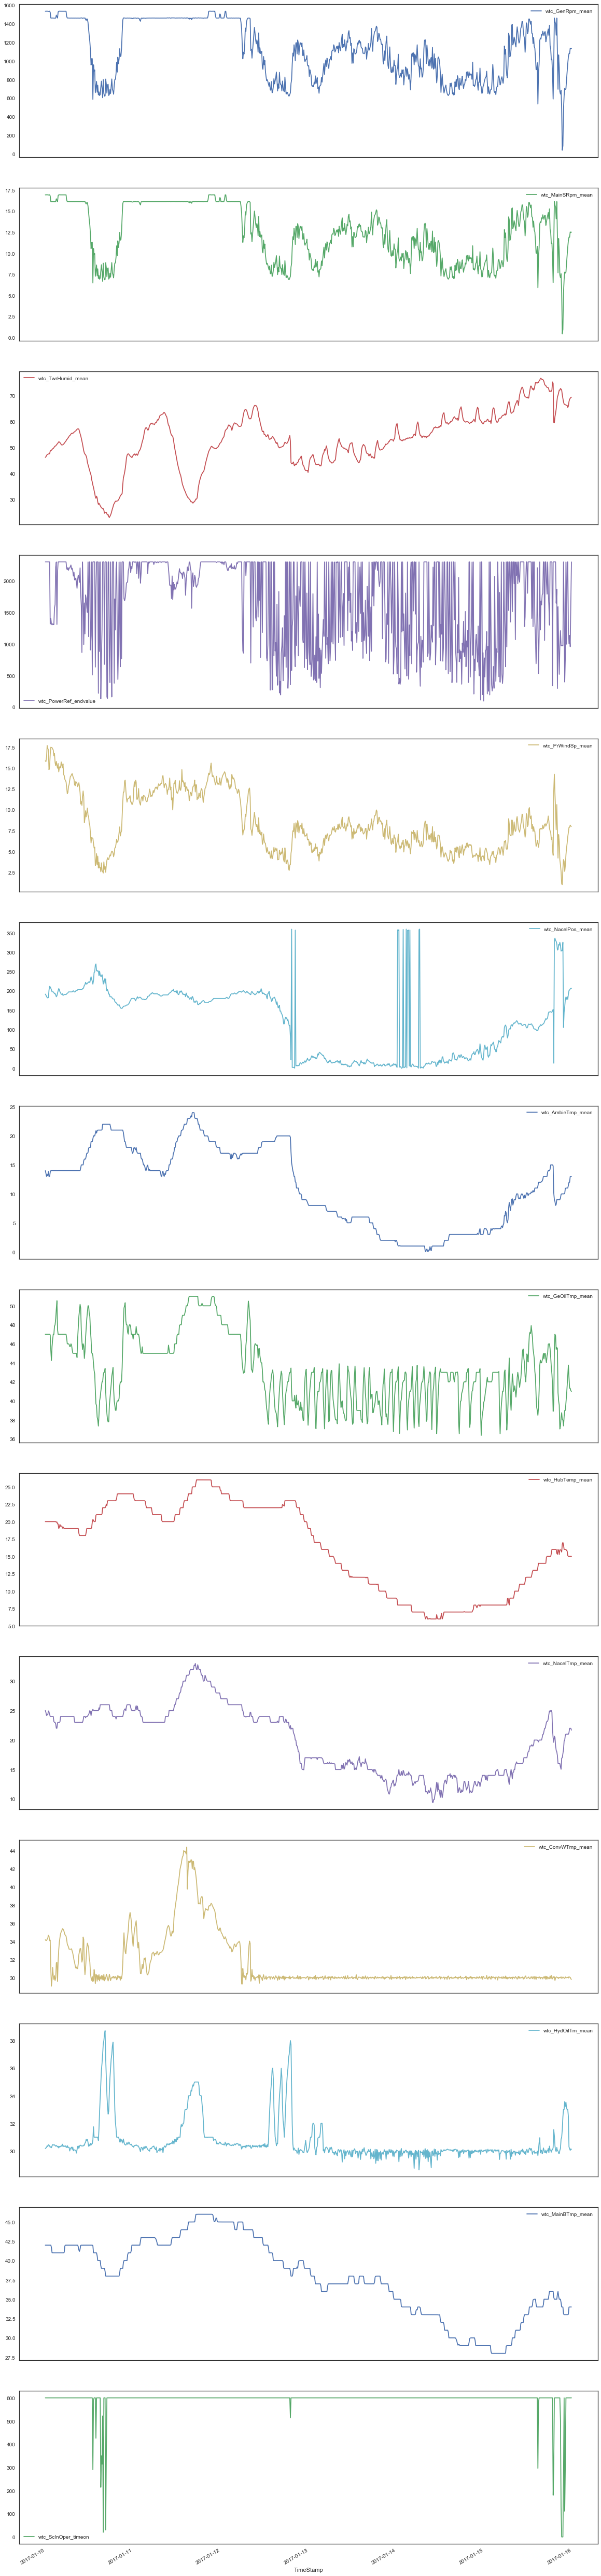

In [25]:
cols = ['wtc_GenRpm_mean', 'wtc_MainSRpm_mean',
       'wtc_TwrHumid_mean', 'wtc_PowerRef_endvalue', 'wtc_PrWindSp_mean',
       'wtc_NacelPos_mean', 'wtc_AmbieTmp_mean', 'wtc_GeOilTmp_mean',
       'wtc_HubTemp_mean', 'wtc_NacelTmp_mean', 'wtc_ConvWTmp_mean',
       'wtc_HydOilTm_mean', 'wtc_MainBTmp_mean','wtc_ScInOper_timeon']
df2[cols].plot(subplots=True, figsize=(20, 100));

In [7]:
#turbines = ['T003','T009','T014','T015','T022','T056','T071']
#df2 = df.loc[df['Name'].isin(turbines)]
df2 = df.loc[df['Name'] == 'T014']
df2 = df2['2017-1-10':'2017-1-15']

In [17]:
plt.figure()
df2['wtc_PowerRef_endvalue'].boxplot(by='Derate')

AttributeError: 'Series' object has no attribute 'boxplot'

In [8]:
sns.set(style="white")

sns.pairplot(df2, hue="Available")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


C:\Users\Casiano\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


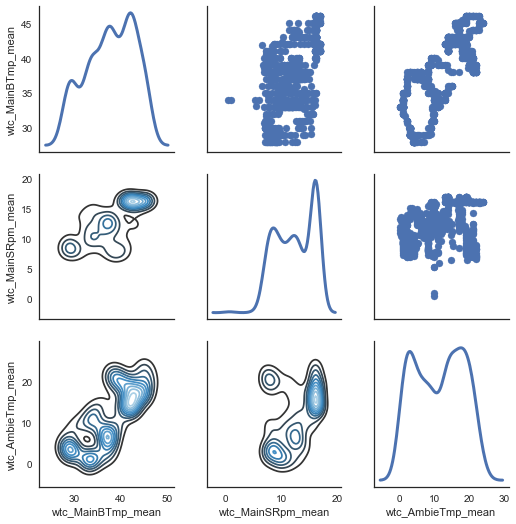

In [9]:
sns.set(style="white")

g = sns.PairGrid(df2[['wtc_MainBTmp_mean','wtc_MainSRpm_mean','wtc_AmbieTmp_mean']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

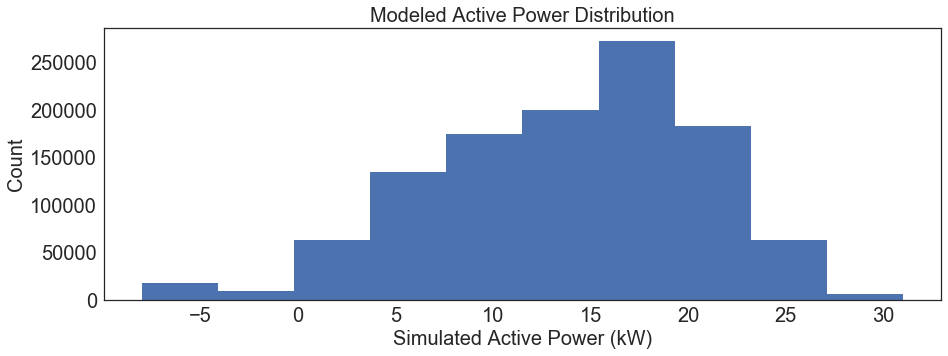

In [48]:
plt.subplots(figsize=(15,5))
plt.hist(df['wtc_AmbieTmp_mean'])
plt.ylabel("Count")
plt.xlabel("Simulated Active Power (kW)")
plt.title("Modeled Active Power Distribution", fontsize=20)
plt.show()

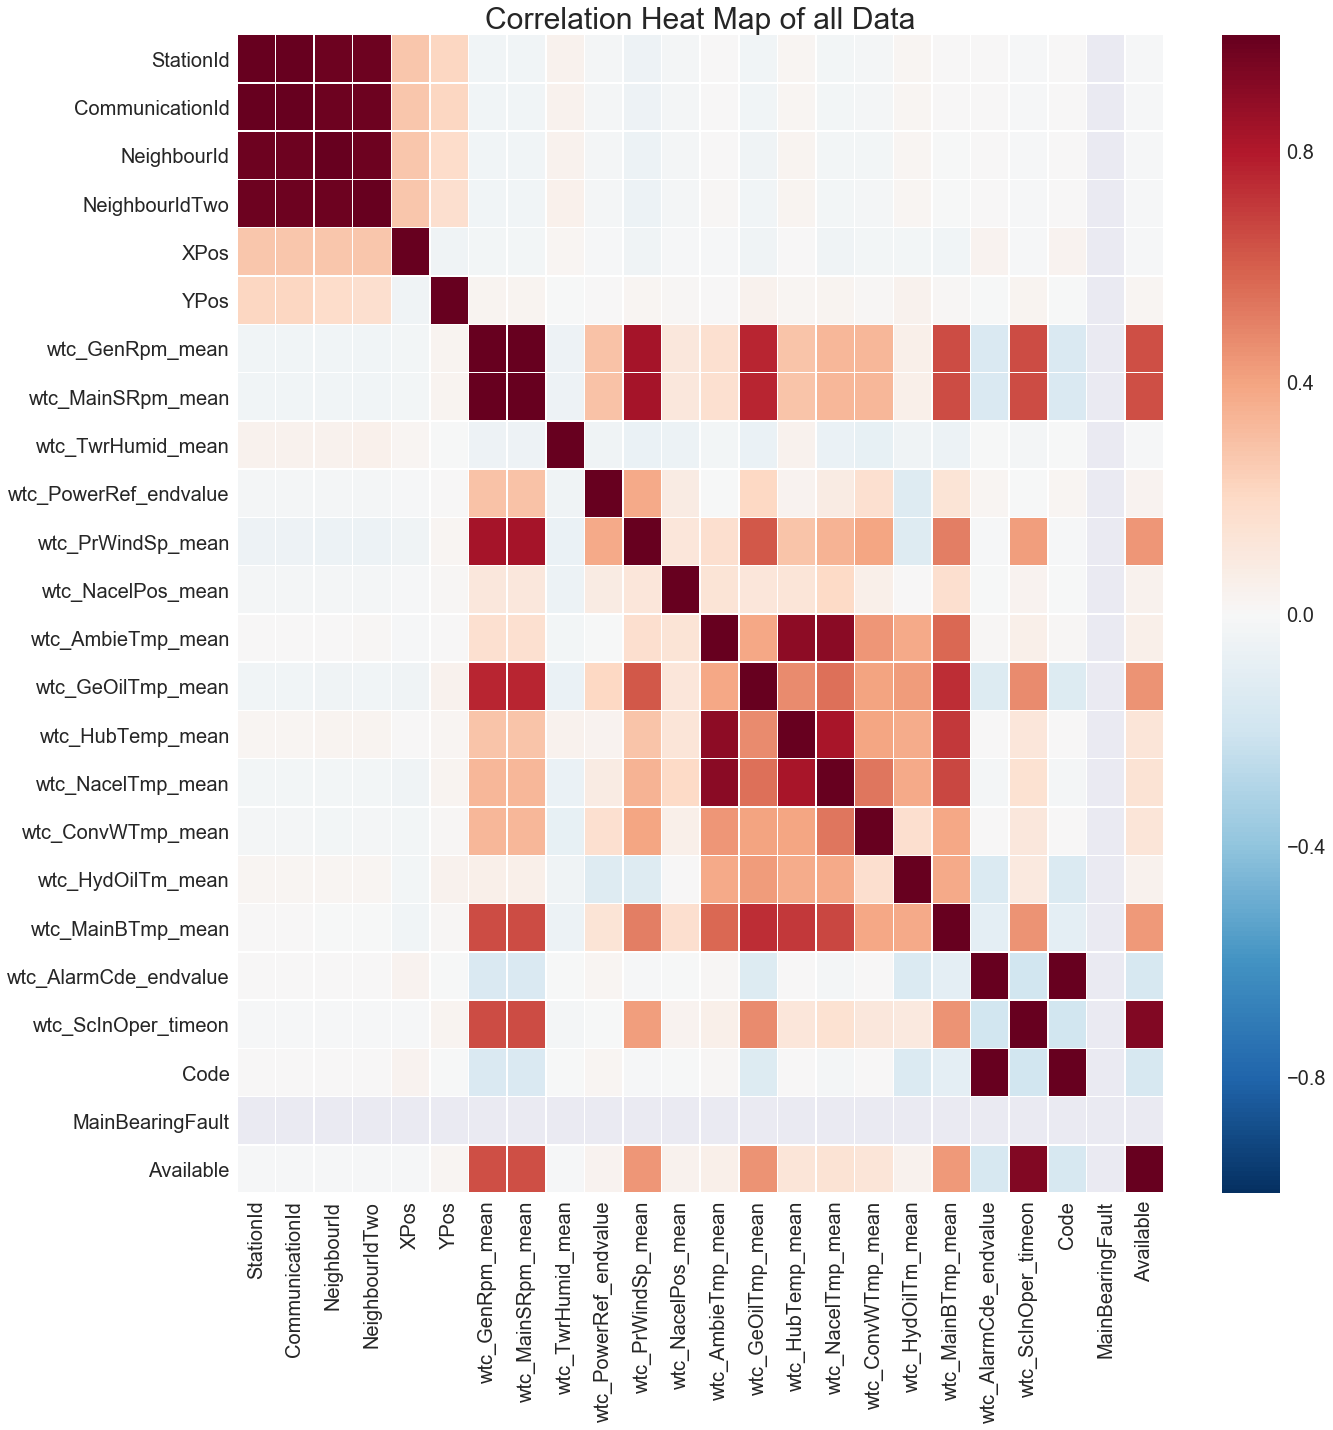

In [24]:
# plot the correlation matricies
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(20, 20)) #taken from Notebook 2: DataVisualization
sns.heatmap(df.corr(), linewidths=0.5)
f.tight_layout()
plt.title("Correlation Heat Map of all Data", size=30)

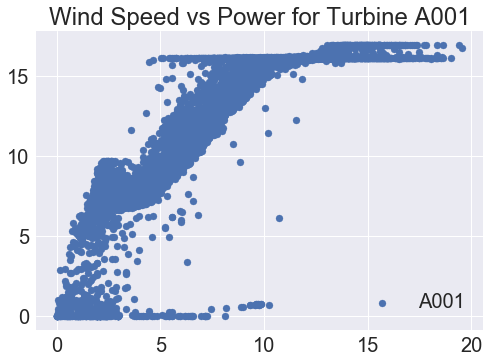

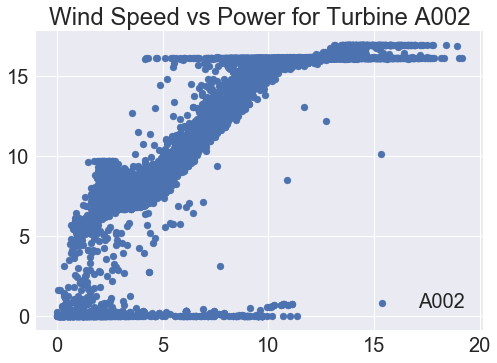

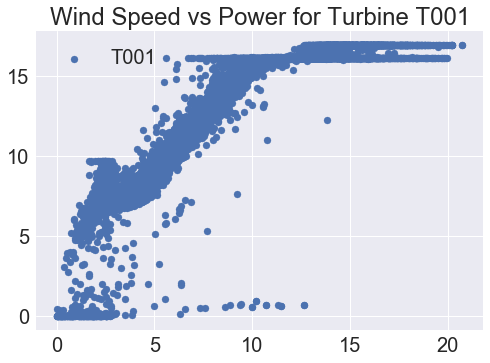

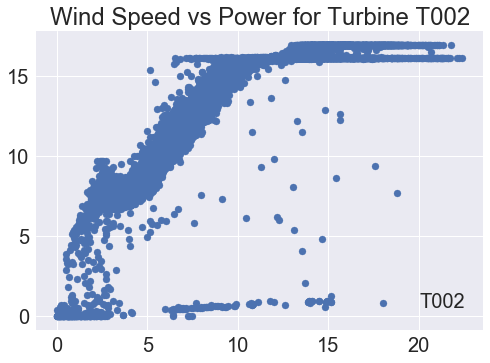

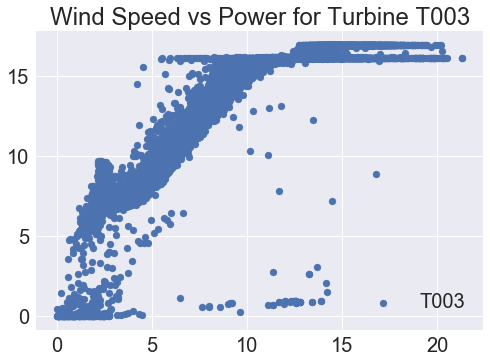

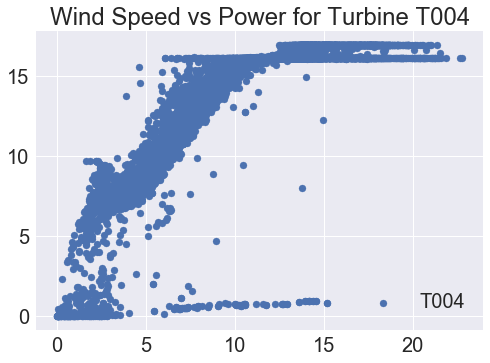

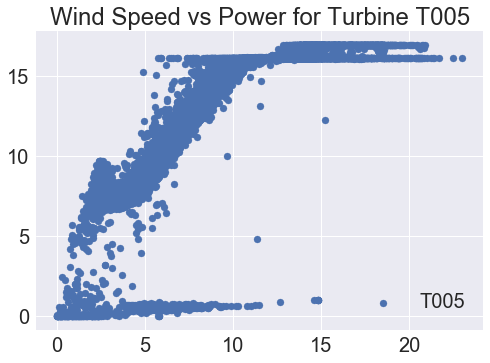

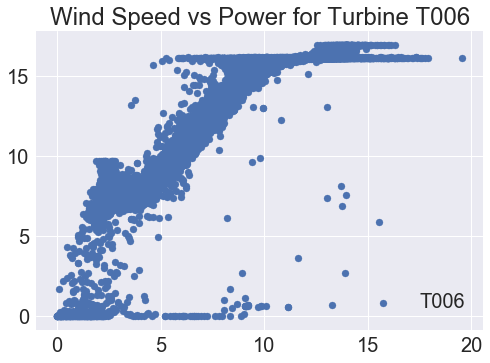

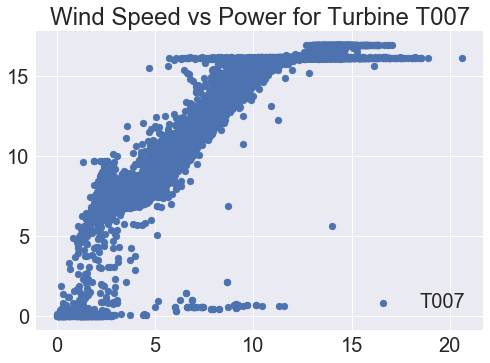

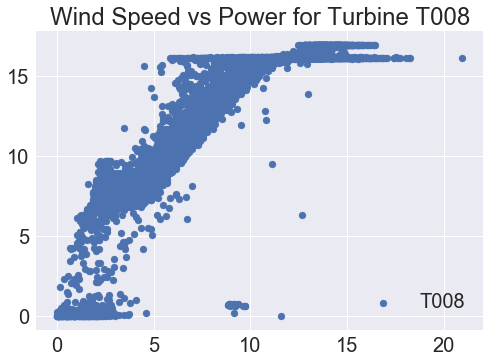

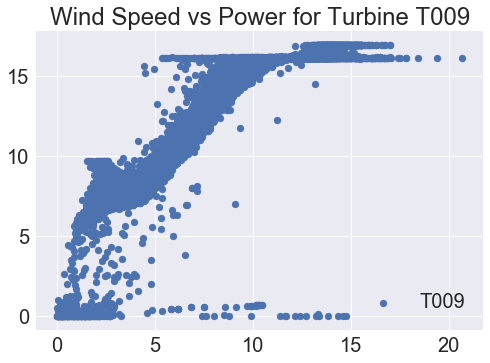

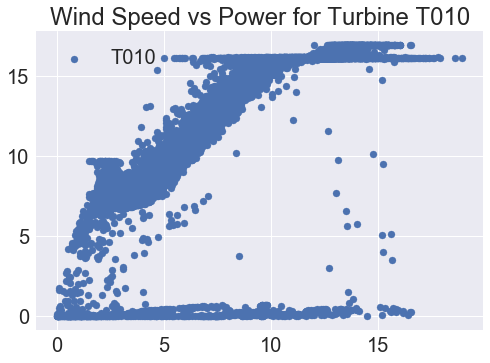

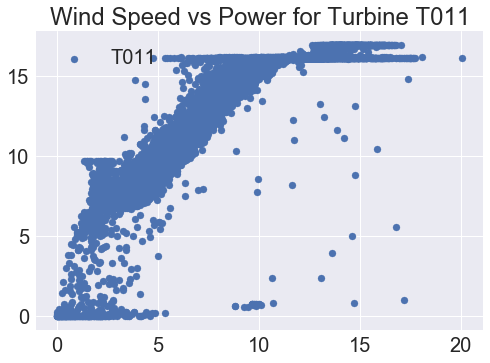

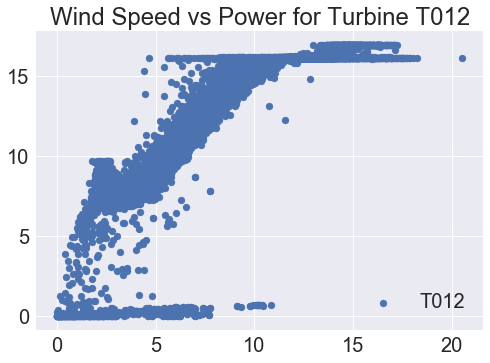

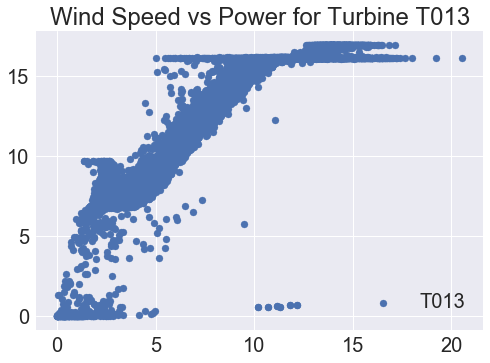

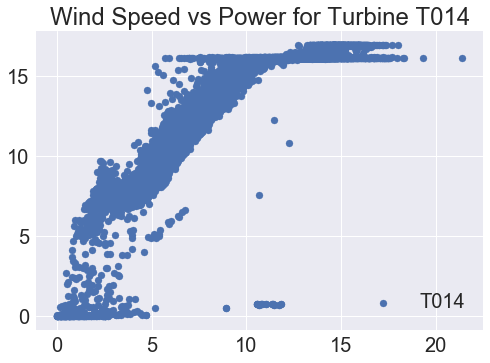

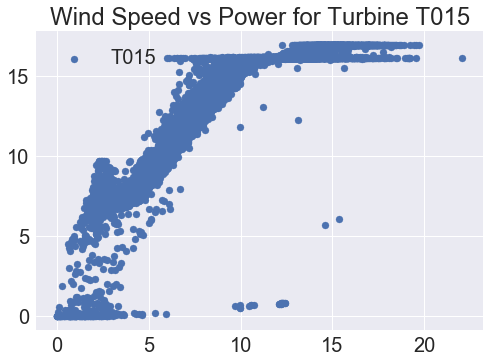

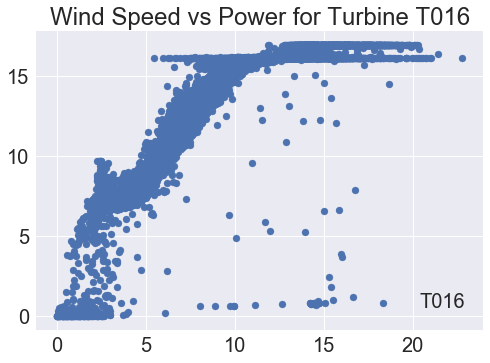

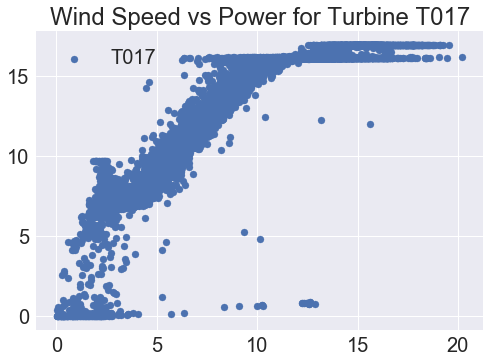

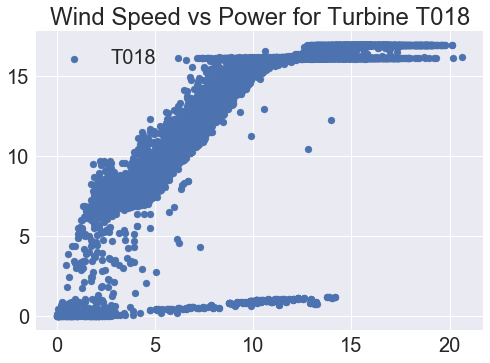

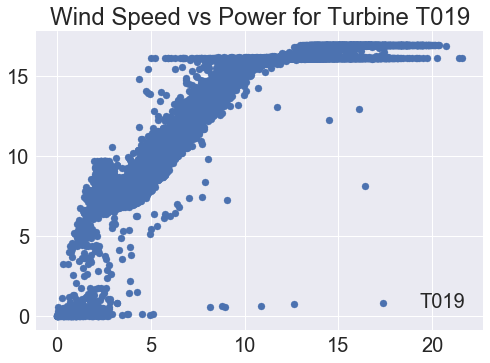

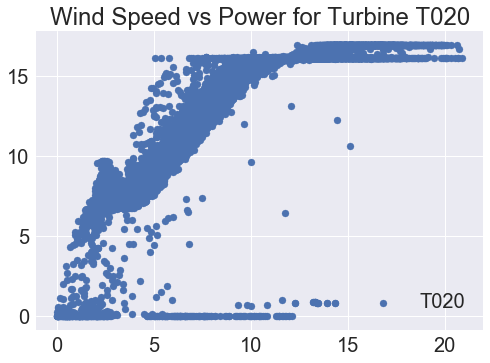

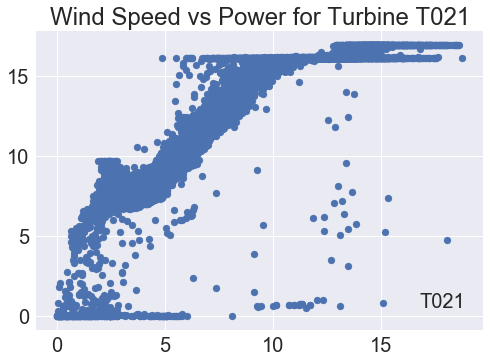

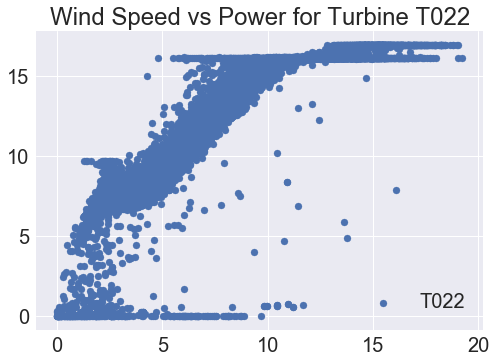

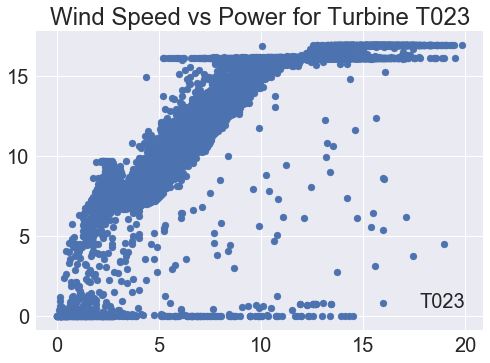

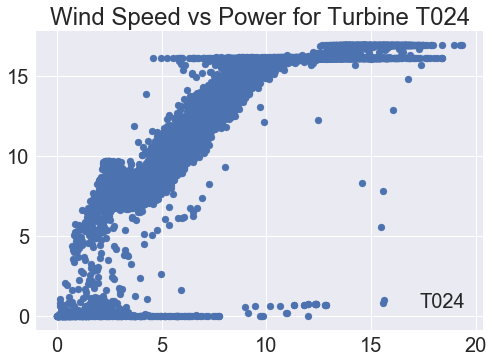

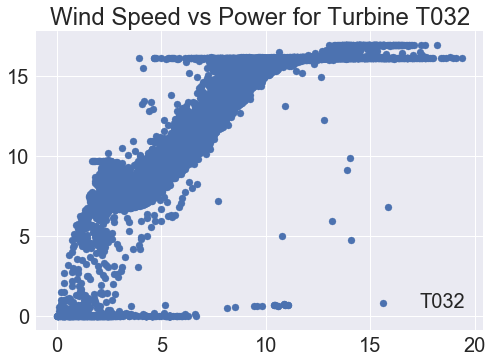

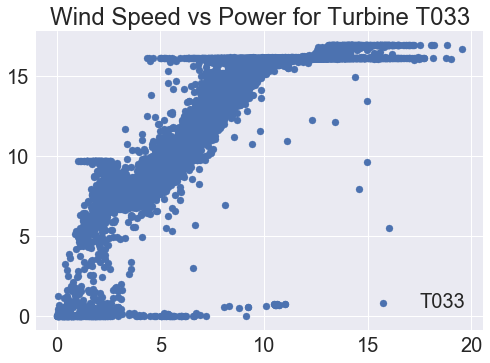

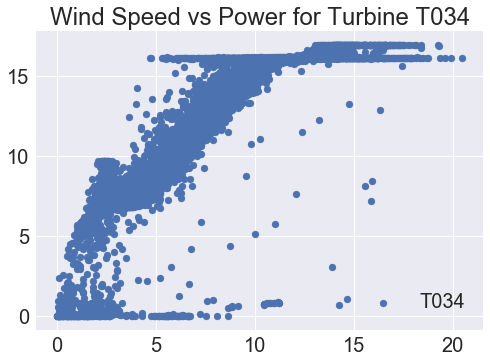

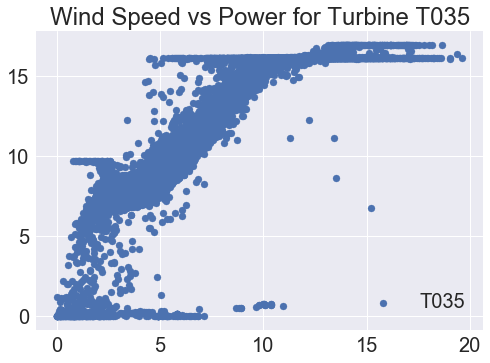

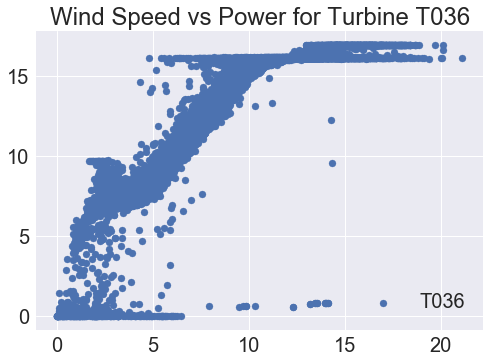

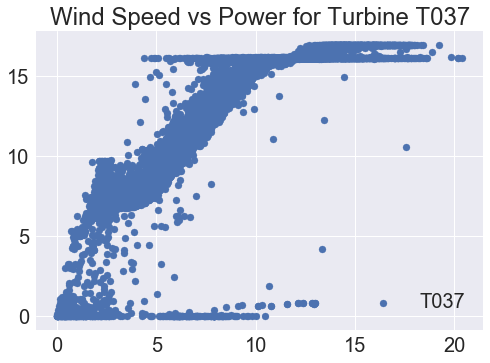

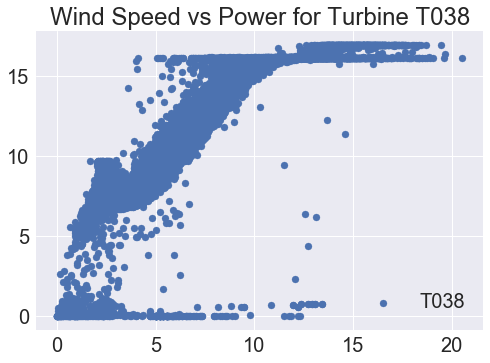

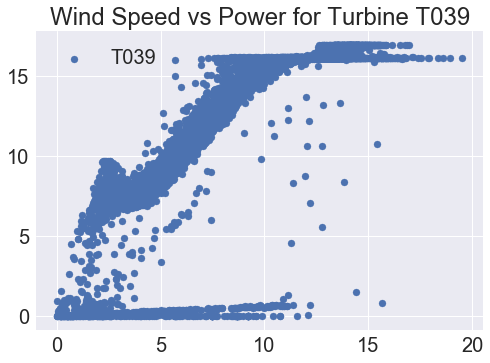

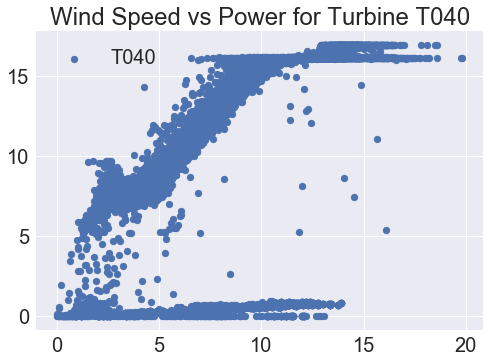

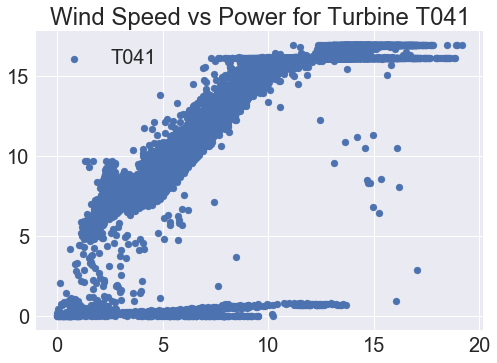

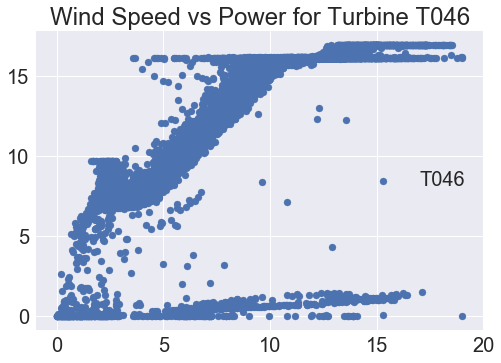

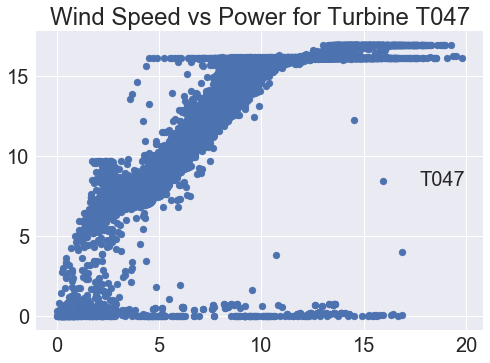

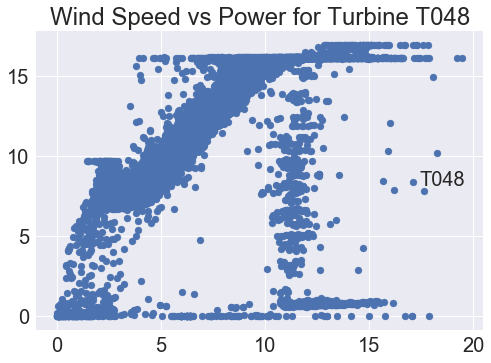

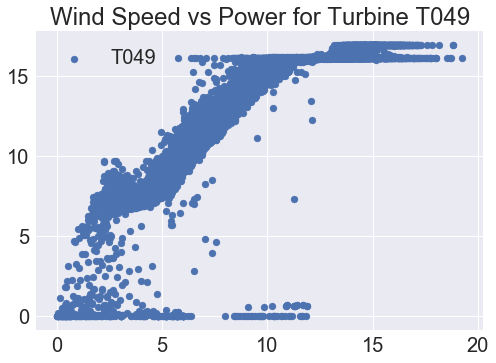

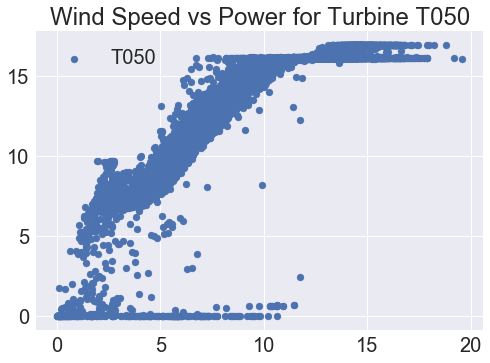

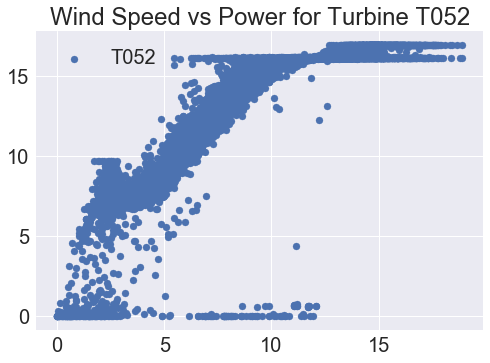

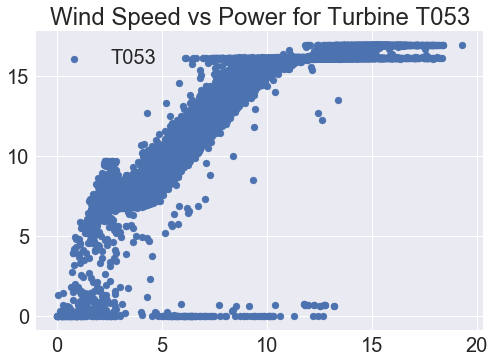

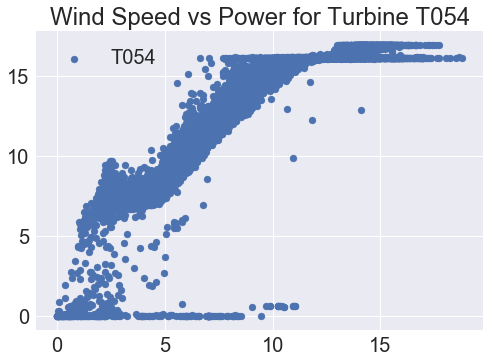

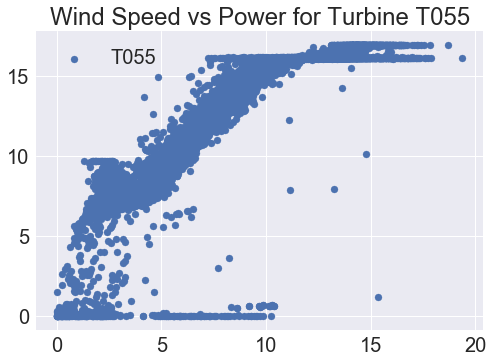

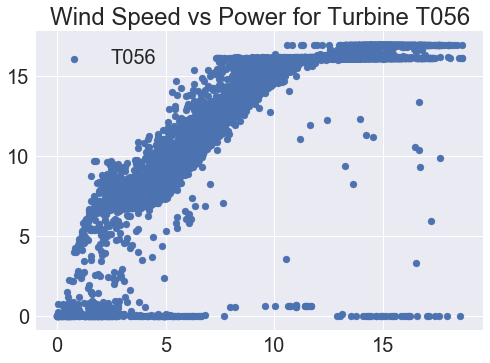

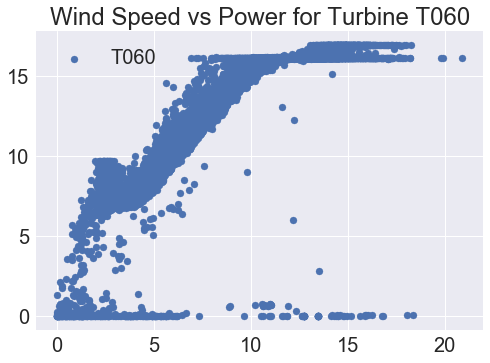

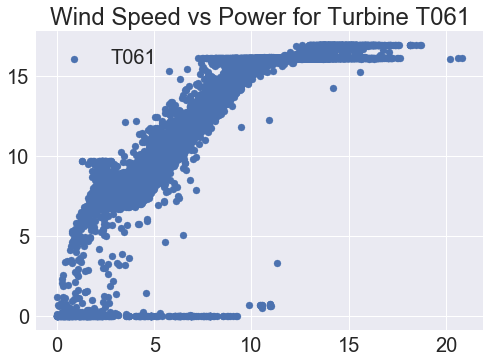

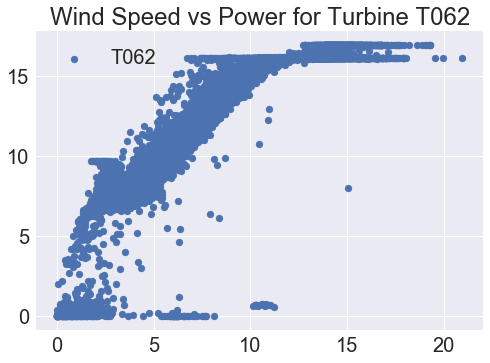

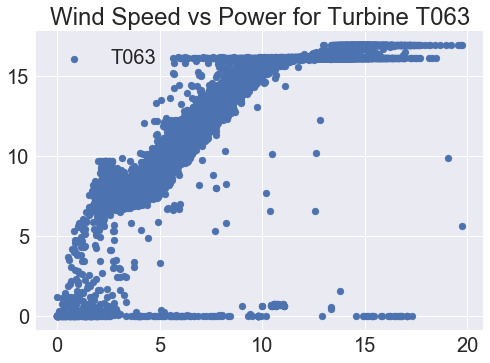

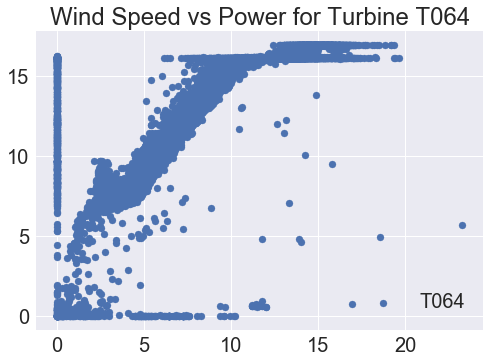

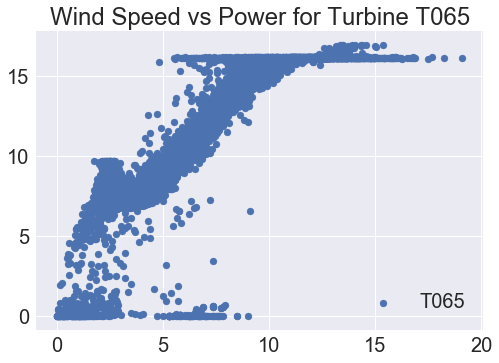

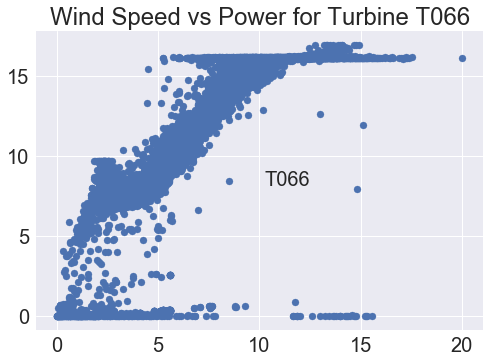

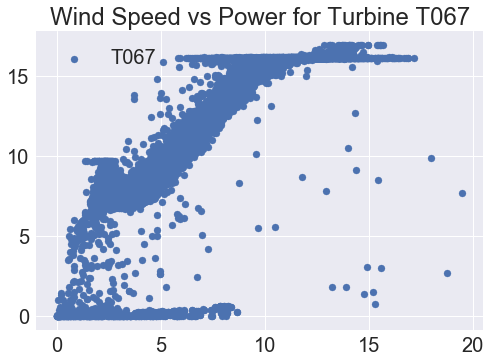

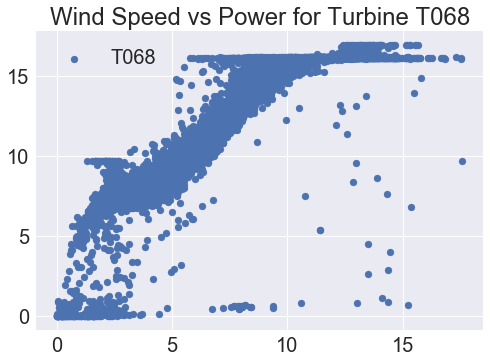

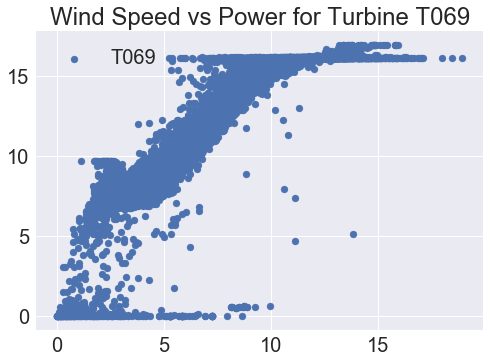

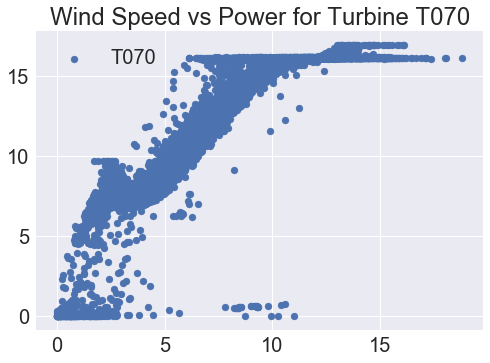

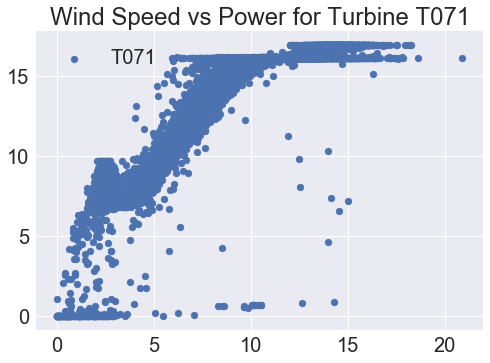

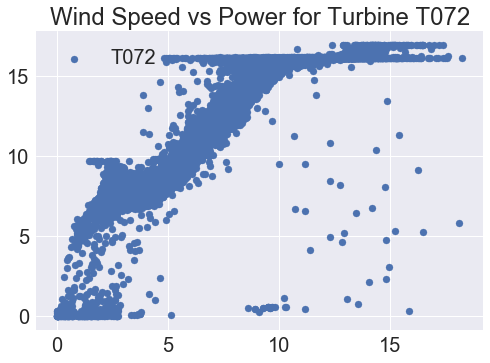

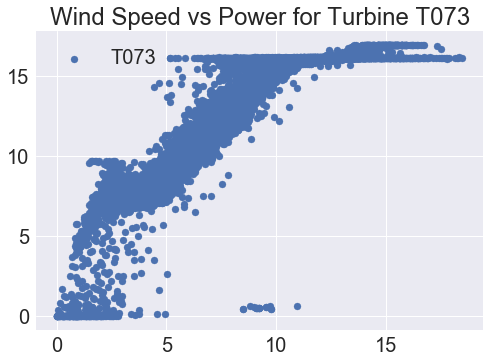

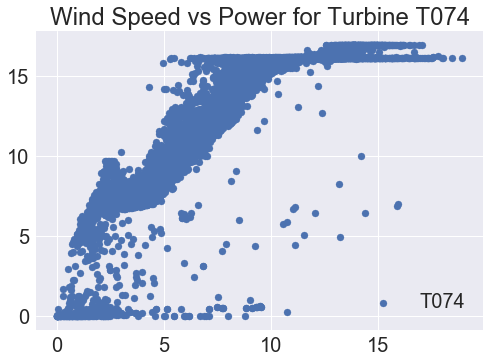

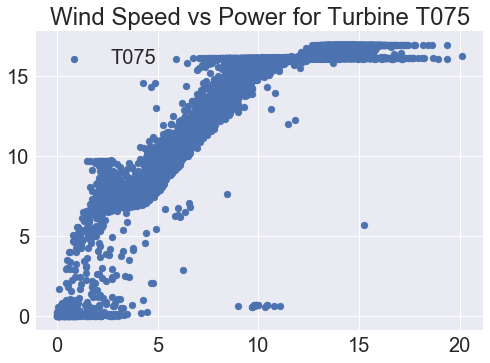

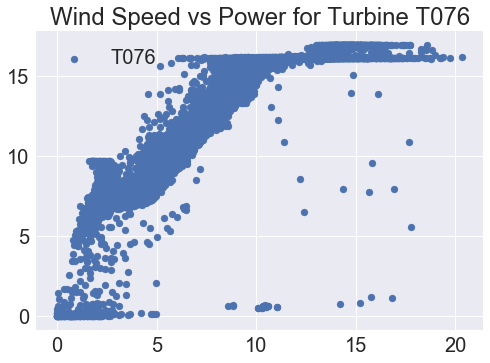

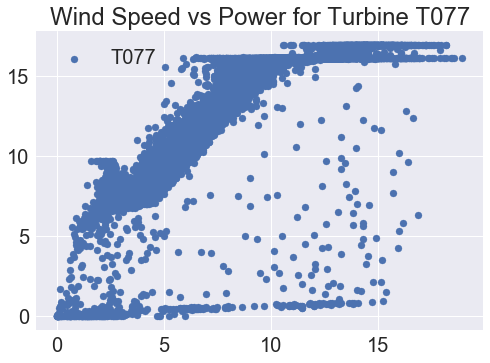

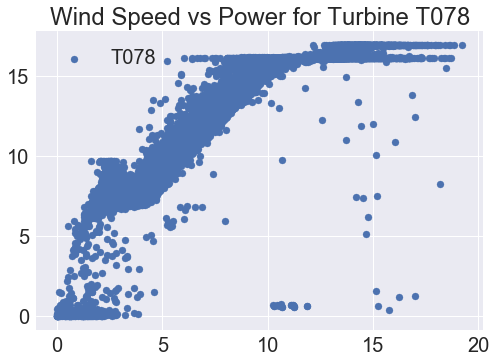

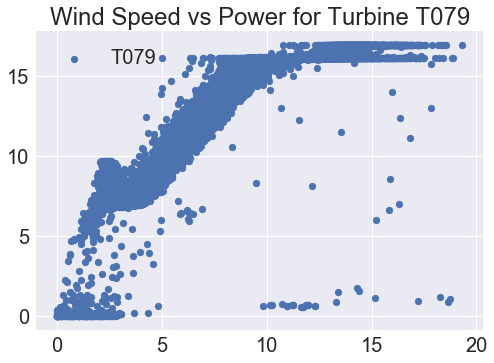

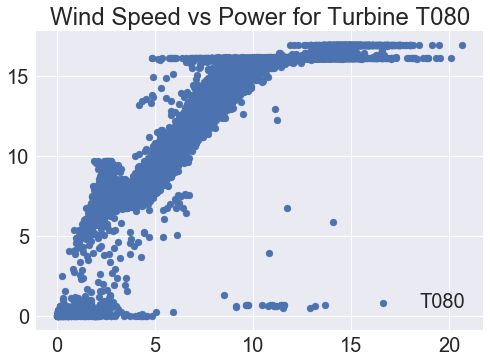

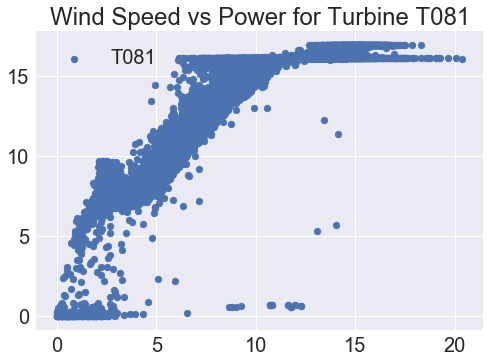

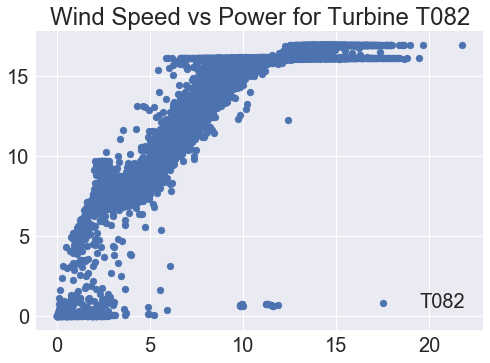

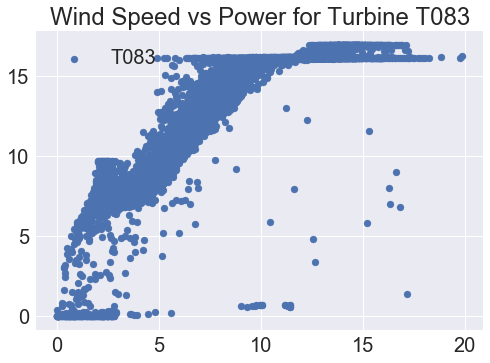

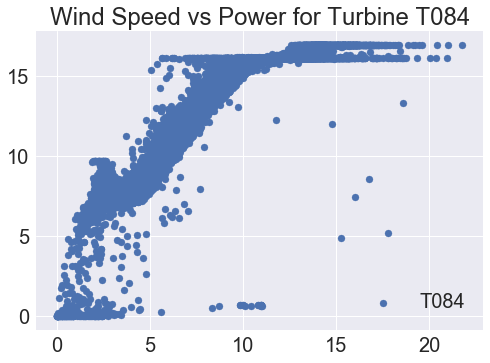

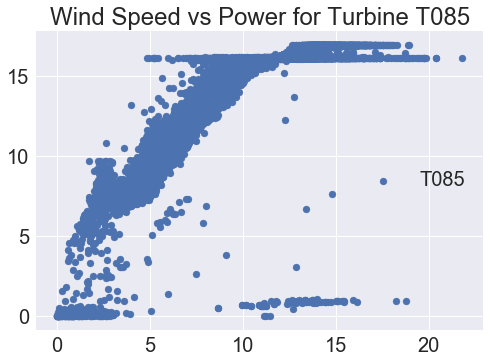

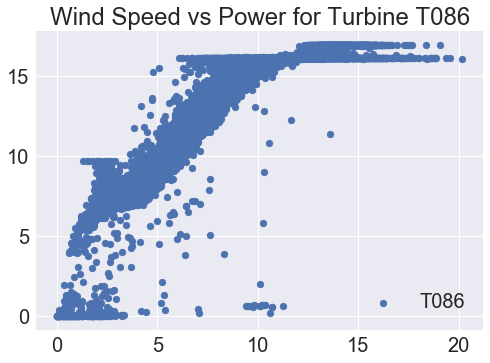

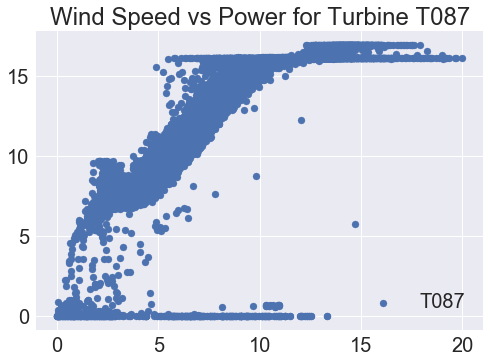

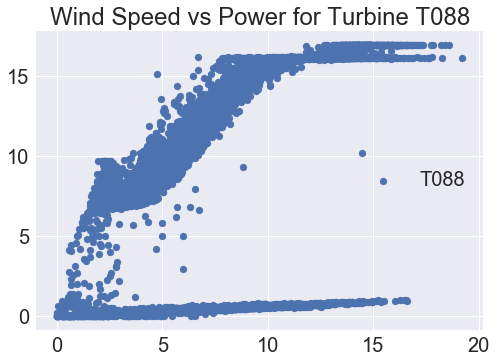

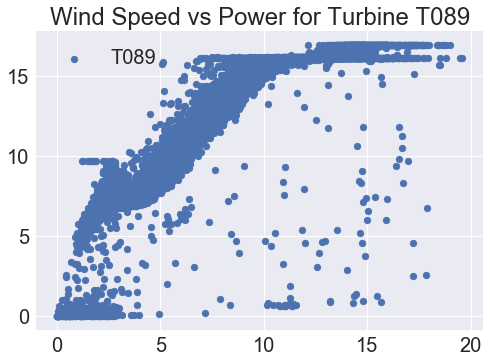

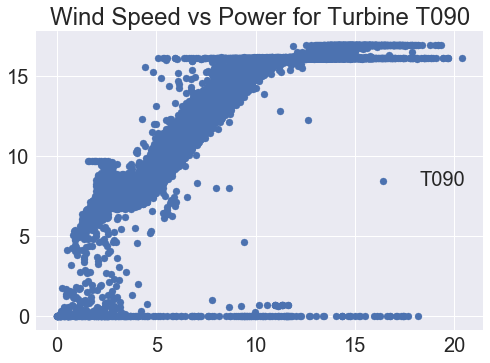

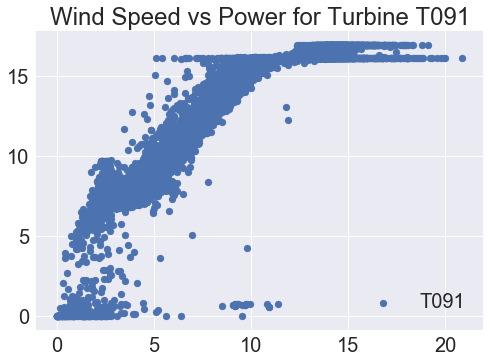

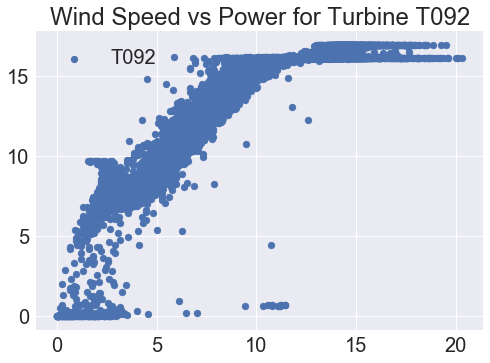

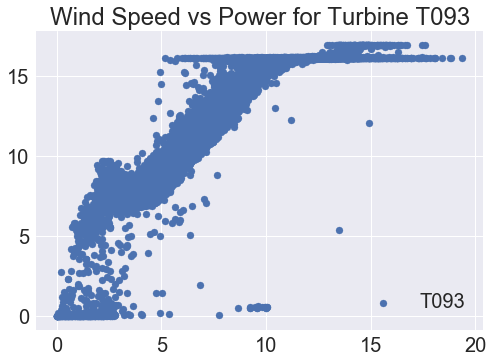

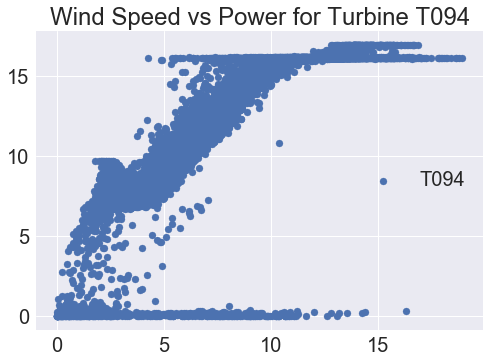

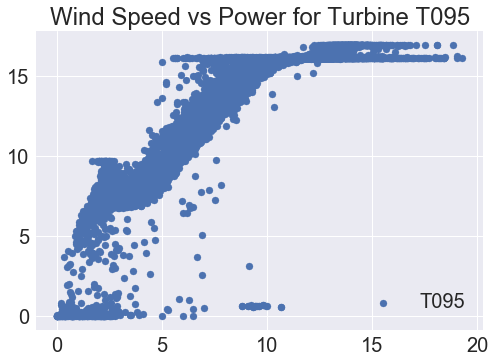

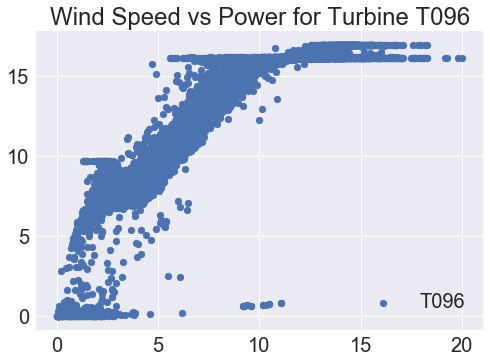

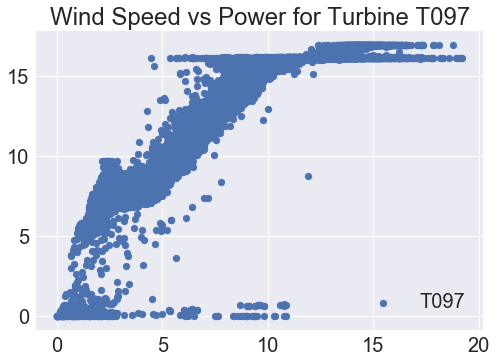

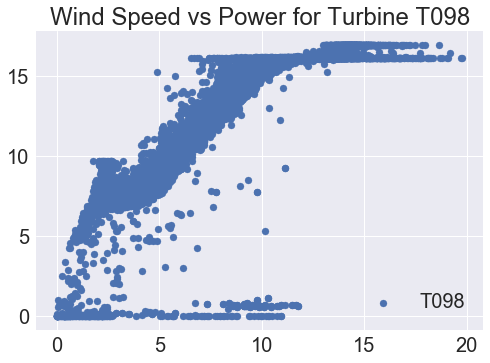

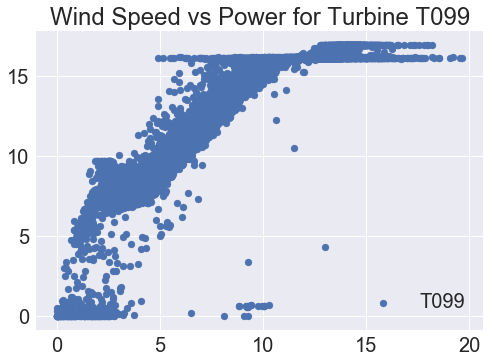

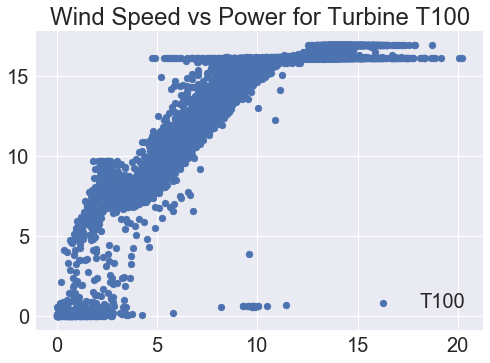

In [26]:
# What are the columns
by_turbine = df.groupby('Name')

for name, group in by_turbine:
    plt.scatter(group['wtc_PrWindSp_mean'], group['wtc_MainSRpm_mean'], label=name)
    plt.title("Wind Speed vs Power for Turbine " + str(name))
    #plt.legend()
    plt.show()

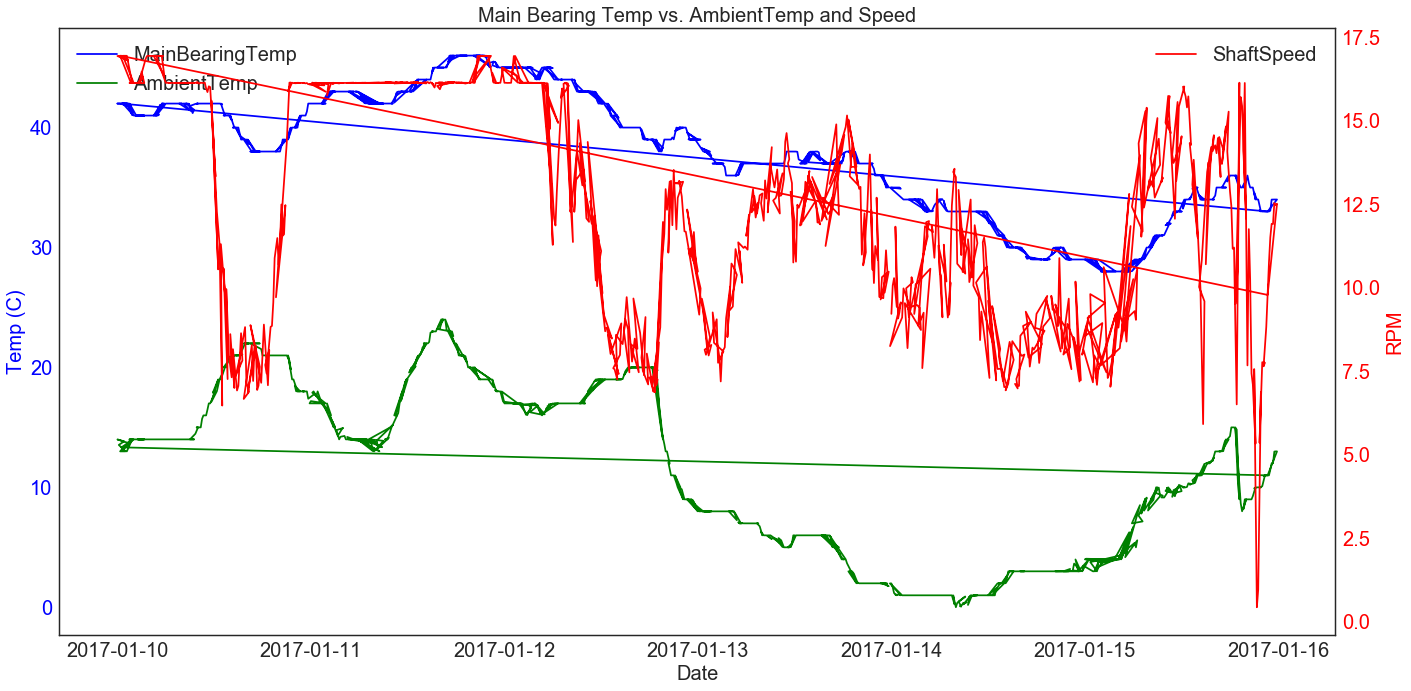

In [42]:
fig, ax1 = plt.subplots(figsize=(20,10))

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

#plt.grid(True)

# Left axis
ax1.plot(df2.index, df2['wtc_MainBTmp_mean'],'b')
ax1.plot(df2.index, df2['wtc_AmbieTmp_mean'],'g')

ax1.set_xlabel("Date")
ax1.set_ylabel("Temp (C)", color='b')
ax1.tick_params('y', colors='b')

# Right axis
ax2 = ax1.twinx()
ax2.set_ylabel("RPM", color='r')
ax2.tick_params('y', colors='r')
ax2.plot(df2.index, df2['wtc_MainSRpm_mean'],'r')

# ax1.axvline('2017-09-14', color='k') # vertical line
# ax1.axvline('2017-09-28', color='k') # vertical line

ax1.set(title='Main Bearing Temp vs. AmbientTemp and Speed')

ax1.legend(['MainBearingTemp', 'AmbientTemp'], loc=2)
ax2.legend(['ShaftSpeed'], loc=1)

fig.tight_layout()
plt.show()

# One hot encoding of the alarm variable

In [45]:
from sklearn.preprocessing import OneHotEncoder

#How many alarm types are there?
print("There are " +  str(len(alarms["Code"].unique())) + " unique alarms in the dataset")
alarms["Code"].unique()

#This could be to many alarms... we may want to pair this down. It could be too much for our purposes

There are 316 unique alarms in the dataset


array([50950, 50100,  3130,   115,    25,   111,    20, 10105,    29,
         142,    67,    68,    69,    62,    92, 10400,   138, 50101,
         127,   140,   139,    54,    58,  8217,    56,   145, 50102,
          27,  1020,  1022,  1001, 50000, 50001,  1005, 13902, 17083,
       13900,     2,     7,    18,     8,  7111,    61,    59,  3127,
         113,    87,  3406,    89,  3207,  3128,   114,  3407,  3208,
       10100,  3126,   112,  3206,  3405,  1003, 17235, 63025,  1012,
        4300,  2124,    40,  9304,  4112,  3203,  3205,  3204,  9303,
        8186,  8184, 50200,  4111, 13319, 13320, 13317, 13314, 13309,
       13311,  1112, 13315, 13301,   134,  3122,  7106,   110, 13150,
       13302, 13303, 18212, 17055, 17027,    76, 63038,    28,    86,
        1140,  5110,  1018,  5111,  5112,  5113, 13214,    48,  1023,
       50008,  1025, 63412, 17065, 64066, 13121, 17058,  8000,    30,
        7101,  3421, 17011, 63210, 63211, 63204, 63209,  3118,    13,
       17107,    14,

In [5]:
 from sklearn.cross_validation import train_test_split

C:\Users\Casiano\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
